# 실제 데이터로 생성 모델 구현
## 키 데이터셋 불러오기

(25000,)


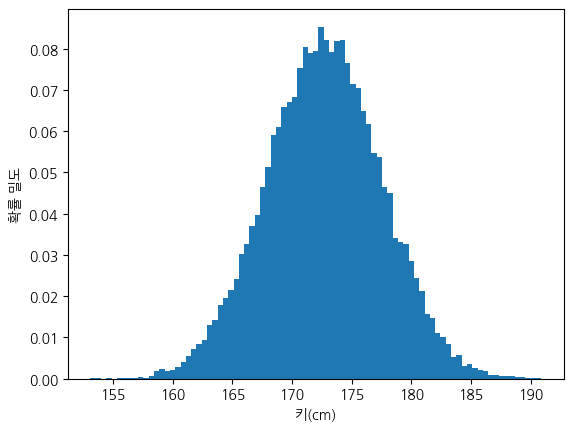

In [3]:
# 필요한 라이브러리 임포트
import os
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 파일 경로 설정 및 데이터 로드
path = os.path.join('data/height.txt')
xs = np.loadtxt(path)
print(xs.shape)  # 데이터 형태 출력

# 히스토그램 그리기
plt.hist(xs, bins='auto', density=True)
plt.xlabel('키(cm)')  # x축 레이블
plt.ylabel('확률 밀도')  # y축 레이블
plt.show()

## 정규 분포를 따르는 생성 모델

In [4]:
mu = np.mean(xs)
sigma = np.std(xs)

print(mu, sigma)

172.70250853667997 4.830167473396299


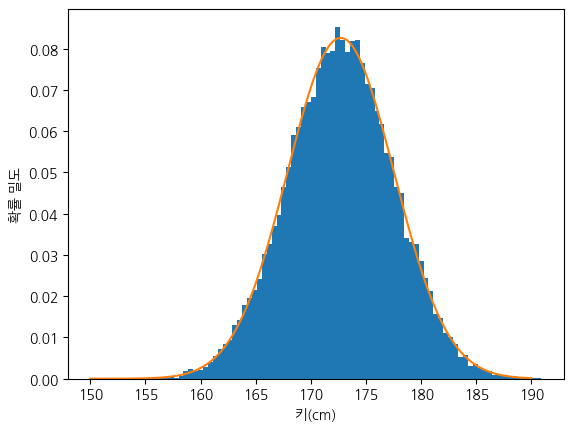

In [5]:
# 정규 분포 함수 정의
def normal(x, mu=0, sigma=1):
    # 정규 분포의 확률 밀도 함수 계산
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

# x축 데이터 생성 (150cm ~ 190cm 구간을 1000개 점으로 나눔)
x = np.linspace(150, 190, 1000)
# 정규 분포 곡선의 y값 계산
y = normal(x, mu, sigma)

# 그래프 그리기
plt.hist(xs, bins='auto', density=True)  # 실제 데이터의 히스토그램
plt.plot(x, y)  # 정규 분포 곡선
plt.xlabel('키(cm)')  # x축 레이블
plt.ylabel('확률 밀도')  # y축 레이블
plt.show()

# 생성 모델의 용도

## 새로이 데이터 생성

In [6]:
np.random.normal(loc=0.0, scale=1.0, size=None)

-0.7030661227193953

In [7]:
sample = np.random.normal(loc=mu, scale=sigma)
sample

167.8381301228851

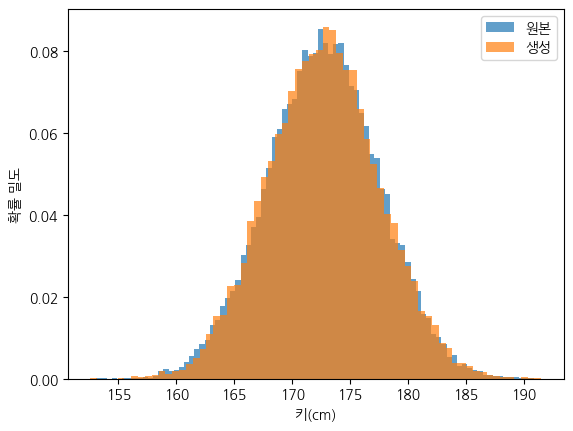

In [8]:
# 정규분포를 따르는 10000개의 샘플 생성
samples = np.random.normal(mu, sigma, 10000)

# 원본 데이터와 생성된 데이터의 히스토그램 그리기
plt.hist(xs, bins='auto', density=True, alpha=0.7, label='원본')  # 원본 데이터 히스토그램
plt.hist(samples, bins='auto', density=True, alpha=0.7, label='생성')  # 생성된 데이터 히스토그램
plt.xlabel('키(cm)')  # x축 레이블
plt.ylabel('확률 밀도')  # y축 레이블
plt.legend()  # 범례 표시
plt.show()  # 그래프 출력

In [13]:
from scipy.stats import norm

x = 160
p1 = norm.cdf(x, mu, sigma)
print(f'p(x <= {x}):', p1)

p(x <= 160): 0.004271406830855


In [15]:
x = 180
p2 = norm.cdf(x, mu, sigma)
print(f'p(x > {x}):', 1-p2)

p(x > 180): 0.06541774339950823
